# HW02: Practice with logistic regression and decision tree

Alexander Scheibe

avscheibe

# 1. Logistic regression

intercept=[-43.55508749], slope=[8.95555845], training score=0.9533333333333334
P(Species=virginica | Petal.Length=5): 0.7725
Predicted Species for Petal.Length=5: virginica


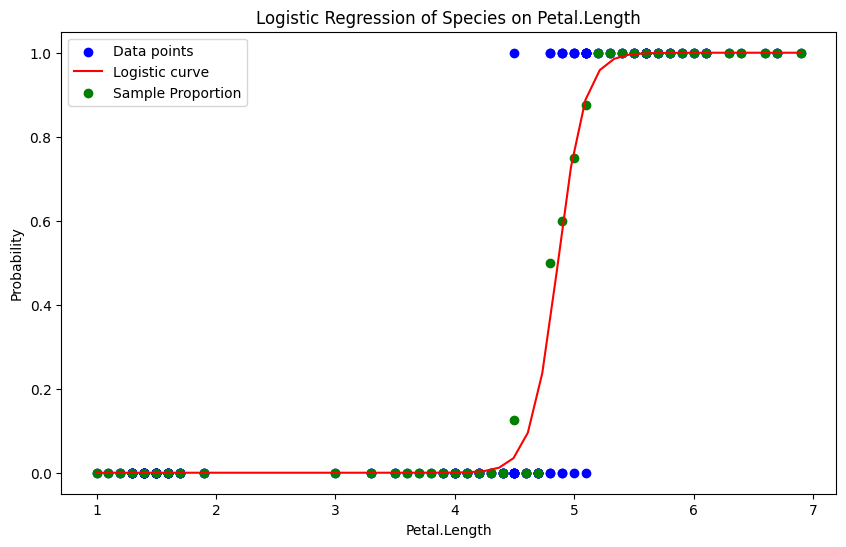

In [1]:
import pandas as pd
from sklearn import linear_model as lm
import numpy as np
import matplotlib.pyplot as plt

df = pd.read_csv("iris.csv")
model = lm.LogisticRegression(C=1000)

df2 = df.loc[df['Species'] != "setosa"]
df2 = df.filter(["Petal.Length","Species"])

y = (df2['Species'] == 'virginica').to_numpy().astype(int)
X = df2["Petal.Length"].to_numpy().reshape(-1, 1)

model.fit(X, y)

b = model.intercept_
w = model.coef_[0]

print(f'intercept={b}, slope={w}, training score={model.score(X, y)}')

prob = model.predict_proba(np.array([[5]]))[0, 1]
print(f"P(Species=virginica | Petal.Length=5): {prob:.4f}")

prediction = model.predict(np.array([[5]]))
species = 'virginica' if prediction == 1 else 'versicolor'
print(f"Predicted Species for Petal.Length=5: {species}")

x_range = np.linspace(df2['Petal.Length'].min(), df2['Petal.Length'].max())
y_values = model.predict_proba(x_range.reshape(-1, 1))[:, 1]

x_values, x_counts = np.unique(X, return_counts=True)
n_x_values = x_values.shape[0]
success_proportion_per_x_value = np.zeros(n_x_values)
for i in np.arange(n_x_values):
    success_proportion_per_x_value[i] = np.sum(y[X[:, 0] == x_values[i]]) / x_counts[i]
    

plt.figure(figsize=(10, 6))

plt.scatter(df2['Petal.Length'], y, color='blue', label='Data points')

plt.plot(x_range, y_values, color='red', label='Logistic curve')

plt.scatter(x_values, success_proportion_per_x_value, color='green', label='Sample Proportion')

plt.xlabel('Petal.Length')
plt.ylabel('Probability')
plt.title('Logistic Regression of Species on Petal.Length')
plt.legend()
plt.show()

## 1b. Do some work with logistic regression by hand.
Consider the logistic regression model, $P(y
_i = 1) = \frac{1}{1 + e^{-(\mathbf{w x} + b)}}\,.$

Logistic regression is named after the log-odds of success, $\ln
  \frac{p}{1 - p}$, where $p = P(y_i = 1)$. Show that this log-odds
  equals $\mathbf{w x} + b$. (That is, start with $\ln
  \frac{p}{1 - p}$ and connect it in a series of equalities to $\mathbf{w x} + b$.)
  


\begin{align*} % In this Latex context, "&" separates columns and "\\" ends a line.
   \ln \frac{p}{1 - p} & = \ln \left( \frac{p}{1 - p} \right) \\
    & = \ln \left( \frac{\frac{1}{1 + e^{-(\mathbf{w} \cdot \mathbf{x} + b)}}}{1 - \frac{1}{1 + e^{-(\mathbf{w} \cdot \mathbf{x} + b)}}} \right) \\
    & = \ln \left( \frac{1}{e^{-(\mathbf{w} \cdot \mathbf{x} + b)} + 1 - 1} \right) \\
&= \ln \left( \frac{1}{e^{-(\mathbf{w} \cdot \mathbf{x} + b)}} \right) \\\\
    & = \ln(1) - \ln \left( e^{-(\mathbf{w} \cdot \mathbf{x} + b)} \right) \\
&= 0 - (-(\mathbf{w} \cdot \mathbf{x} + b)) \\
    & = \mathbf{w x} + b\\
 \end{align*}


### 1c. Do some more work with logistic regression by hand.

I ran some Python/scikit-learn code to make the model pictured here: ![](https://pages.stat.wisc.edu/~jgillett/451/02/toyLogistic.png)

From the image and without the help of running code, match each code line from the top list with its output from the bottom list.

1. `model.intercept_`
2. `model.coef_`
3. `model.predict(X)`
4. `model.predict_proba(X)[:, 1]`

A. `array([0, 0, 0, 1])`,
B. `array([0.003, 0.5, 0.5, 0.997])`,
C. `array([5.832])`,
D. `array([0.])`

1: D
2: C
3: A
4: B

# 2. Decision tree

   Survived  Pclass     Sex   Age
0         0       3    male  22.0
1         1       1  female  38.0
2         1       3  female  26.0
3         1       1  female  35.0
4         0       3    male  35.0
5         0       3    male   NaN
6         0       1    male  54.0
Shape before dropping rows: (891, 4)
Shape after dropping rows: (714, 4)
Accuracy of tree with max_depth=None: 0.896
Tree depth: 15
Accuracy of tree with max_depth=2: 0.803


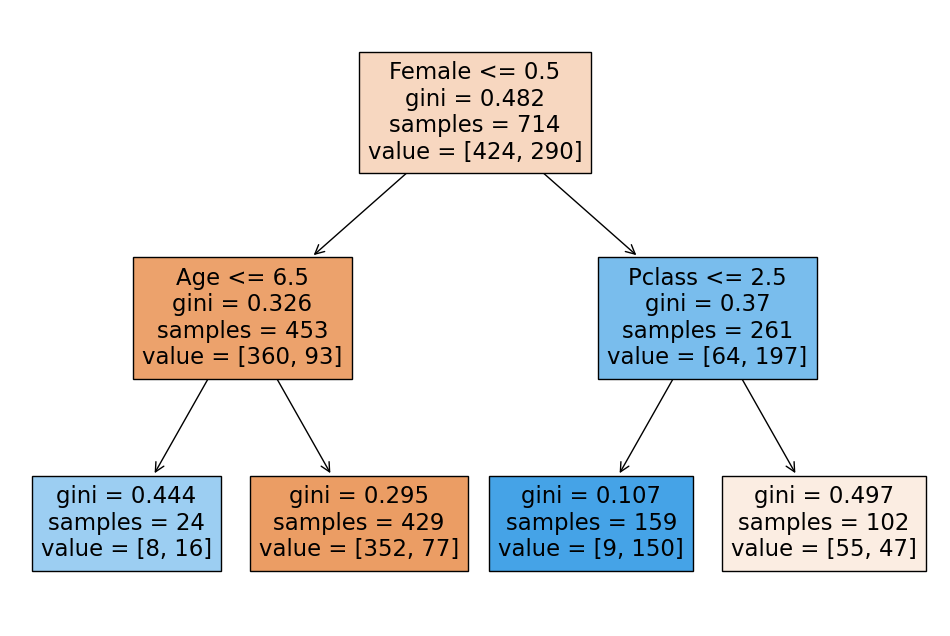

In [2]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt

from sklearn.tree import DecisionTreeClassifier
from sklearn import tree 

df = pd.read_csv("kaggle_titanic_train.csv")
df = df[['Survived', 'Pclass', 'Sex', 'Age']]

print(df.head(7))

print("Shape before dropping rows:", df.shape)
df = df.dropna()
print("Shape after dropping rows:", df.shape)

df['Female'] = df.Sex == 'female'


X = df[['Pclass', 'Age', 'Female']]
y = df['Survived']

clf1 = DecisionTreeClassifier(max_depth=None)
clf1.fit(X, y)

accuracy1 = clf1.score(X, y)
print(f"Accuracy of tree with max_depth=None: {accuracy1:.3f}")
print(f"Tree depth: {clf1.tree_.max_depth}")

clf2 = DecisionTreeClassifier(max_depth=2)
clf2.fit(X, y)

accuracy2 = clf2.score(X, y)
print(f"Accuracy of tree with max_depth=2: {accuracy2:.3f}")

plt.figure(figsize=(12, 8))
tree.plot_tree(clf2, feature_names=['Pclass', 'Age', 'Female'], filled=True)
plt.show()

## 2b. Which features are used in the (max_depth=2) decision-making? Answer in a markdown cell.

Female

Age 

PClass

 ## 2c. What proportion (in the cleaned-up data) of females survived? What proportion of males survived?
 Answer in two sentences via print(), with each proportion rounded to three decimal places.
 
 Hint: There are many ways to do this. One quick way is to find the average of the `Survived`
 column for each subset.

In [3]:
# ... your code here ...
female_survival_rate = df[df['Female'] == True]['Survived'].mean()
male_survival_rate = df[df['Female'] == False]['Survived'].mean()

print(f"The proportion of females who survived is {female_survival_rate:.3f}.")
print(f"The proportion of males who survived is {male_survival_rate:.3f}.")

The proportion of females who survived is 0.755.
The proportion of males who survived is 0.205.


## 2d. Do some decision tree calculations by hand.
Consider a decision tree node containing the following set of examples $S =
\{(\mathbf{x}, y)\}$ where $\mathbf{x} = (x_1, x_2)$:

((4, 9), 1)

((2, 6), 0)

((5, 7), 0)

((3, 8), 1)

Find the entropy of $S$.

Num 1's = 2, Num Ex. = 4

Entropy = 

$-0.5 * log_2(0.5) - (-0.5) * log_2(1 - 0.5)$

= $-0.5 * -log_2(0.5)$

= 1

Entropy = 1



 ## 2e. Do some more decision tree calculations by hand.

To summarize my work: 

I sorted the features of $x_1$ and $x_2$ from least to greatest and then split each adjacent node by a threshold equal to $\frac{x_n[i] + x_n[i + 1]}{2}$.

In this testing process, I found that a threshold of 7.5 for feature $x_2$ yielded a very nice split of ((2, 6), 0) ((5, 7), 0) and ((4, 9), 1) ((3, 8), 1) which consequently yields the lowest weighted entropy which was equal to 0. 

Calculating the weighted entropy of split: 

Left (S_):

0 $-log_2(0)$ - (1 - 0) $-log_2(1)$

0 - 0 = 0

Right (S+):

-1 $-log_2(1)$ - (1-1) $-log_2(0)$


0 - 0 = 0

$\frac{2}{4}$(0) + $\frac{2}{4}$(0) = 0





Threshold: 7.5 Feature: $x_2$